<a href="https://colab.research.google.com/github/lophiraalata/data-analytics-micro-credential/blob/assignments/IH_InClass_LabAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem

## Conduct a detailed and conclusive analysis of a dataset

The notebook MUST INCLUDE:
   * All steps necessary from the template.
   * At least 5 Data Visualizations studying the data and explanation of the graph/plot chosen.
   * A well written explanation of every model used and parameters employed.
   * A Logistic Regression Model with a least 2-3 data splits rates and explanation of the accuracy of each model.
   * A KNN Analytic model with a least 2-3 data splits rates and explanation of the accuracy of each model.  And code analysis for    choosing a 'k' value.

   * BONUS:
      * An SVC Model with a least 2-3 data splits rates and explanation of the accuracy of each model.
      * SVC explanation... (https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989)

# Task 2: Load the libraries

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set()

# Task 3: Load the data

In [52]:
!wget https://raw.githubusercontent.com/lophiraalata/ML-Data/main/iris.csv

--2022-07-27 23:36:44--  https://raw.githubusercontent.com/lophiraalata/ML-Data/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3865 (3.8K) [text/plain]
Saving to: ‘iris.csv.2’

iris.csv.2          100%[===================>]   3.77K  --.-KB/s    in 0s      

2022-07-27 23:36:44 (39.0 MB/s) - ‘iris.csv.2’ saved [3865/3865]



# Task 4: EDA (Exploratory Data Analysis)

### Helpful info

* an _iris_ is a genus of flowering plant. it includes hundreds of species, including Setosa, Virginica, and Versicolor.

* a _sepal_ is a part of the flower enclosing the petals

* a _petal_ is a modified leaf or segment of flower that surrounds the reproductive parts of the flower

In [53]:
df = pd.read_csv("iris.csv")

In [122]:
df.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [124]:
# the 'class' category will likely cause issues with the model
# machine learning algorithms work best with numerical values, not letters

df.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [125]:
# our features are Sepal_Length, Sepal_Width, Petal_Length, and Petal_Width

df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [126]:
# noting again that 'class' column contains object dtype rather than int or float
# all other of the other entries are float datatype
# we might need to covnert categorical features to dummy variables using Pandas 
# If we dont then our ML model will not be able to directly take in those features as inputs

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [93]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [127]:
# there are no missing values in this dataset

df.isnull()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [59]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [128]:
# looking at all the values in the dataset, we can see that it is relatively clean already
# we can also see that there are three different classes of flowers included in the dataset
# this will be important for our EDA

df.values

array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Setosa'],
       [5.0, 3.0, 1.6, 0.

In [103]:
df[['Petal_Length', 'Petal_Width', 'Sepal_Length', 'Sepal_Width']].head(150)

,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


In [77]:
df.groupby(['Class'])['Petal_Length'].count()
# aggregating the data, we can see that there are 50 of each class of flower, an even split
# 1/3 of the data belong to the 'Setosa' class
# 1/3 of the data belong to the 'Versicolor' class
# 1/3 of the data belong to the 'Virginica' class

Class
Setosa        50
Versicolor    50
Virginica     50
Name: Petal_Length, dtype: int64

## Summary statistics:

In [130]:
# the average petal LENGTH across all classes
df['Petal_Length'].mean()

3.7580000000000005

In [131]:
# the median petal LENGTH across all classes
# half of the flowers had petals shorter than this and the other half had longer petals
df['Petal_Length'].median()

4.35

In [132]:
# the average petal WIDTH across all classes
df['Petal_Width'].mean()

1.1993333333333336

In [133]:
# the median petal WIDTH across all classes
# half of the flowers had petals wider than this and the other half had more narrow petals
df['Petal_Width'].median()

1.3

In [134]:
# the average sepal LENGTH across all classes
df['Sepal_Length'].mean()

5.843333333333334

In [135]:
# the median sepal LENGTH across all classes
# half of flowers measured had sepals longer than this and the other hald had shorter sepals
df['Sepal_Length'].median()

5.8

In [136]:
# the average sepal WIDTH across all classes
df['Sepal_Width'].mean()

3.0573333333333337

In [138]:
# the median sepal WIDTH across all classes
# hald of the flowers measured had sepals wider than this and the other half had more narrow sepals
df['Sepal_Width'].median()

3.0

#### Statistics by Class:

there are three classes of flowers in the dataset
* Setosa
* Versicolor
* Virginica

In [139]:
# the flower class with the greatest average sepal length is Virgincia
# The flower class with the greatest average sepal width is Setosa

# the flower class with the greatest average petal length is Virginica
# the flower class with the greatest average petal width is Virginica

df.groupby(['Class']).mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Class,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [118]:
df.groupby(['Class']).median()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Class,,,,
Setosa,5.0,3.4,1.50,0.2
Versicolor,5.9,2.8,4.35,1.3
Virginica,6.5,3.0,5.55,2.0


# Task 5: Data visualization

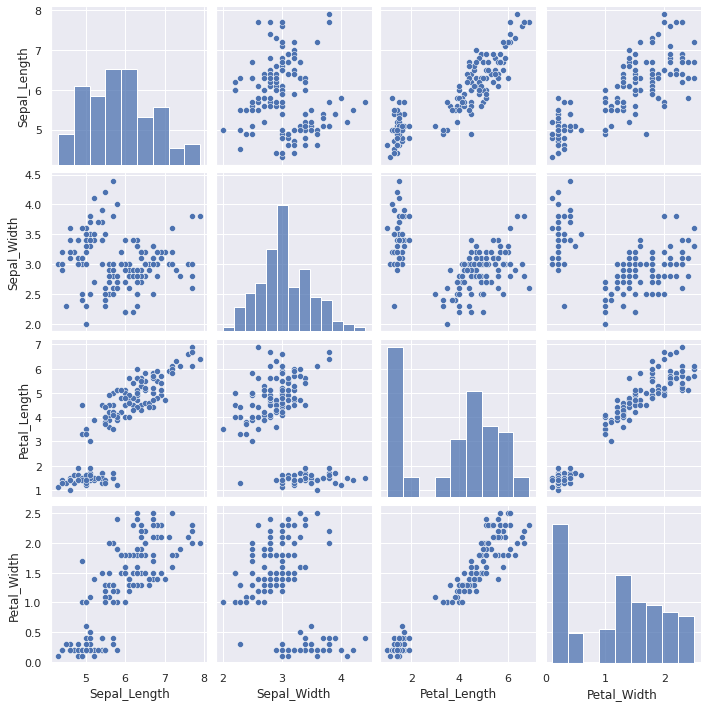

In [141]:
# this plots pairwise relationships in the dataset
# this function creates a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. 
# The diagonal plots are treated differently: 
# a univariate distribution plot is drawn to show the marginal distribution of the data in each column

sns.pairplot(df)

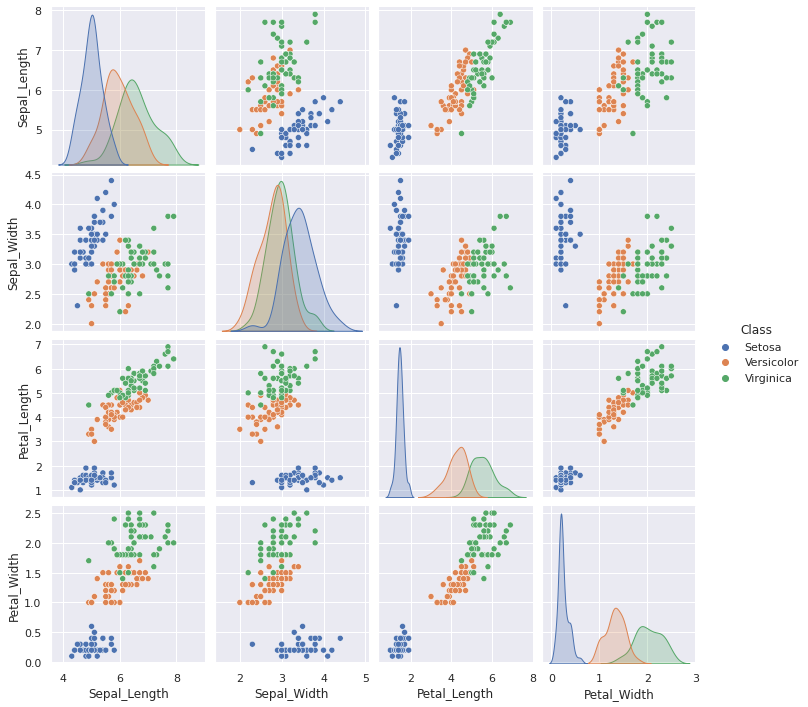

In [143]:
# this pairplot is far more useful for our purposes because it groups the data according to Class
# looking at the legend, we can see that Setosa is represented by blue, Versicolor by orange, and Virginica in green
# this helps us see trends within Class groups and see how different features compare

sns.pairplot(df, hue='Class')

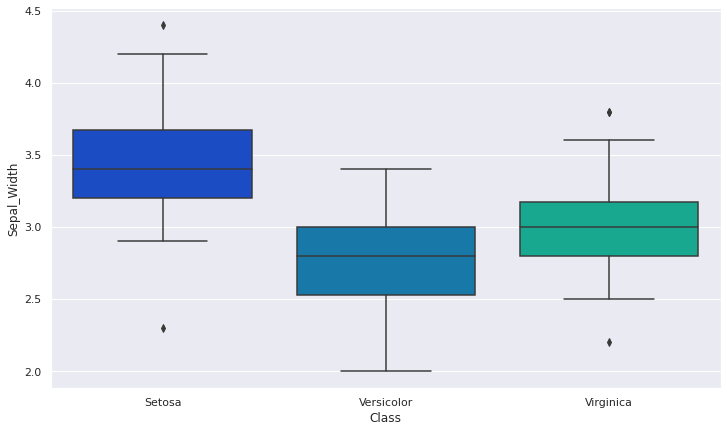

In [149]:
# this boxplot is useful because it shows us the max, min, and median values for the feature of our choice
# this plot shows Sepal_Width according to Class, it accounts for the different categories of iris
# we can see that the 'Setosa' class tended to have the widest sepals, followed by Virginica, and then Versicolor
# we should note that there are outliers which means we cannot draw definitive conclusions about which class of flower has the widest sepals

plt.figure(figsize=(12,7))
sns.boxplot(x='Class', y='Sepal_Width', data=df, palette='winter')

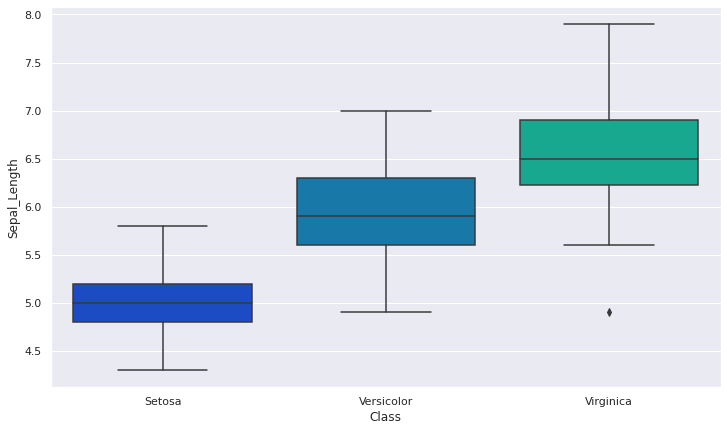

In [161]:
# this boxplot shows sepal width by class, showing each of the 3 categories of iris
# we can see 

plt.figure(figsize=(12,7))
sns.boxplot(x='Class', y='Sepal_Length', data=df, palette='winter')

In [107]:
df2 = df['Class']

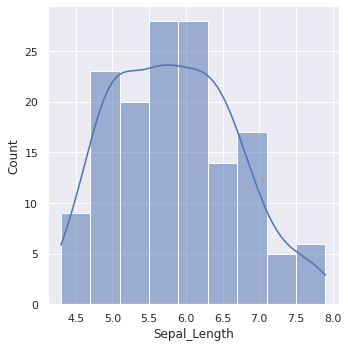

In [71]:
sns.displot(df["Sepal_Length"], kde=True)

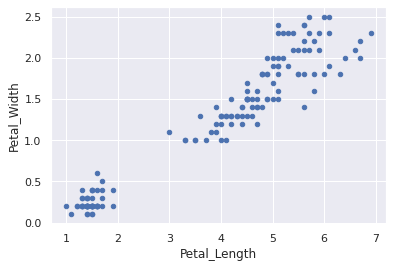

In [74]:
df.plot(kind='scatter', x='Petal_Length', y='Petal_Width');

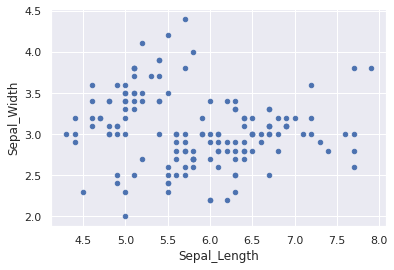

In [75]:
df.plot(kind='scatter', x='Sepal_Length', y='Sepal_Width');

# Task 6: Perform the train test split

In [154]:
from sklearn.model_selection import train_test_split

In [92]:
from pandas.core.reshape.reshape import get_dummies
Class = pd.get_dummies(df['Class'])

In [ ]:
X = []
y =

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

NameError: ignored

# Task 7: Conduct a logistic regression

In [151]:
# import the logistic regression model

from sklearn.linear_model import LogisticRegression

In [152]:
# create the model by assigning a variable to the class pertaining to the model selected

logmodel = LogisticRegression()

In [153]:
# train the model using the fit method

logmodel.fit(X_train,y_train)

NameError: ignored

In [ ]:
# feature scaling

from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Task 8: Conduct a KNN analysis

In [ ]:
# feature scaling

In [ ]:
# train test split

In [ ]:
# K Nearest Neighbors

In [ ]:
df = pd.get_dummies(df,{'Class'})

# Task 9: Evaluate the models



# Task 10: Make predictions and draw conclusions

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# visualize the training set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# visualize the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()